## Day 3: Pandas Lab: 

### Further Practice on:
* renaming dataframe columns
* df.groupby()
* pd.merge()
* Accessing data via APIs

### Motivating Question: 
How is GDP per capita associated to the socioeconomic_index metric we saw in our sample education outcomes dataset? 

Can we visualize the relationship between the two? 

In [ ]:
!pip install wbgapi

In [1]:
import numpy as np
import pandas as pd

import wbgapi as wbg
import json
import requests

In this exercise, we will access a few datasets from web sources via their Application Programming Interface (APIs).

NOTE: For more information on APIs, skip to the bottom of this notebook! 

### STEP 1: Create dataframe _df_gdp_pc_ with data on Gross Domestic Product (GDP) Per Capita for countries

In this section we pull in data on GDP per capita from the World Bank's World Development Indicators API: 

https://datahelpdesk.worldbank.org/knowledgebase/topics/125589-developer-information

https://pypi.org/project/wbgapi/

In [2]:
# df_gdp_pc is a dataframe that pulls in GDP per capita data for the past 2 years

df_gdp_pc = wbg.data.DataFrame(series=['NY.GDP.PCAP.CD'], mrv=2).reset_index()

NOTE: If we were interested in getting data for total population by country, we would use the name of that indicator ('SP.POP.TOTL') instead 
    
```df_pop = wbg.data.DataFrame(series=['SP.POP.TOTL'], mrv=3)```

In [3]:
# Examine the first three observations; 
# NOTE how this dataframe only has country codes

df_gdp_pc.head(3)

,economy,YR2018,YR2019
0,ABW,NaN,NaN
1,AFG,493.750418,507.103432
2,AGO,3289.646664,2790.726615


In [4]:
# Let's rename the columns so they describe the data better:

df_gdp_pc.rename(columns={"YR2018":"gdp_pc_2018", 
                          "YR2019":"gdp_pc_2019",}, 
                 inplace = True)

### STEP 2: Create dataframe _df_codes_ that has both the 3-digit country codes and country names

In [7]:
# Get dataframe named df_codes, which has information on both iso3 codes to country names, 
# We pull this in from the from World Bank's API as well

codes = requests.get("http://api.worldbank.org/v2/country/?per_page=300", params ={"format":"json"})
df_codes = pd.DataFrame(json.loads(codes.text)[1])

In [8]:
# Let's see what this dataframe looks like 

df_codes.head(3)

,id,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
0,ABW,AW,Aruba,"{'id': 'LCN', 'iso2code': 'ZJ', 'value': 'Lati...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'HIC', 'iso2code': 'XD', 'value': 'High...","{'id': 'LNX', 'iso2code': 'XX', 'value': 'Not ...",Oranjestad,-70.0167,12.5167
1,AFG,AF,Afghanistan,"{'id': 'SAS', 'iso2code': '8S', 'value': 'Sout...","{'id': 'SAS', 'iso2code': '8S', 'value': 'Sout...","{'id': 'LIC', 'iso2code': 'XM', 'value': 'Low ...","{'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'}",Kabul,69.1761,34.5228
2,AFR,A9,Africa,"{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': 'Aggregates'}",,,


In [9]:
# Let's keep a few select columns

df_codes = df_codes[["id", "iso2Code", "name", "capitalCity","longitude", "latitude"]]

### Now we have two dataframes: _df_gdp_pc_ and _df_codes_. 

### Can you think of how we might combine them?

In [10]:
df_gdp_pc.head(3)

,economy,gdp_pc_2018,gdp_pc_2019
0,ABW,NaN,NaN
1,AFG,493.750418,507.103432
2,AGO,3289.646664,2790.726615


In [11]:
df_codes.head(3)

,id,iso2Code,name,capitalCity,longitude,latitude
0,ABW,AW,Aruba,Oranjestad,-70.0167,12.5167
1,AFG,AF,Afghanistan,Kabul,69.1761,34.5228
2,AFR,A9,Africa,,,


### EXERCISE 1: Create a new dataframe _df_gdf_pc_new_ by combining df_gdp_pc with df_codes

#### 1a:

First, rename the "economy" column in _df_gdp_pc_ to "id".  That way both dataframes have identical names for the 3-digit country code (i.e. iso3) column

In [12]:
# YOUR CODE HERE: 





In [13]:
# Inspect the renamed df_codes dataframe. Does it look like this?

df_gdp_pc

,id,gdp_pc_2018,gdp_pc_2019
0,ABW,NaN,NaN
1,AFG,493.750418,507.103432
2,AGO,3289.646664,2790.726615
3,ALB,5284.380184,5353.244856
4,AND,41793.055258,40886.391165
...,...,...,...
259,XKX,4419.914327,4430.784947
260,YEM,824.117629,774.334490
261,ZAF,6372.605655,6001.401121
262,ZMB,1516.390661,1305.063254


#### 1b:
Create a new dataframe named df_gdf_pc_new by combining the two datasets above (i.e. df_codes and df_gdp_pc)

HINT: Use pd.merge() with the right arguments

In [14]:
# YOUR CODE HERE:






In [15]:
# Inspect your new dataframe.

df_gdp_pc_new

,id,iso2Code,name,capitalCity,longitude,latitude,gdp_pc_2018,gdp_pc_2019
0,ABW,AW,Aruba,Oranjestad,-70.0167,12.5167,NaN,NaN
1,AFG,AF,Afghanistan,Kabul,69.1761,34.5228,493.750418,507.103432
2,AFR,A9,Africa,,,,NaN,NaN
3,AGO,AO,Angola,Luanda,13.242,-8.81155,3289.646664,2790.726615
4,ALB,AL,Albania,Tirane,19.8172,41.3317,5284.380184,5353.244856
...,...,...,...,...,...,...,...,...
292,XZN,A5,Sub-Saharan Africa excluding South Africa and ...,,,,NaN,NaN
293,YEM,YE,"Yemen, Rep.",Sana'a,44.2075,15.352,824.117629,774.334490
294,ZAF,ZA,South Africa,Pretoria,28.1871,-25.746,6372.605655,6001.401121
295,ZMB,ZM,Zambia,Lusaka,28.2937,-15.3982,1516.390661,1305.063254


### Get the example education dataset we have been using:

Once, again, we are going to work with the example dataset from before, which is a simplified version of aggregated data you might derive from international education databases such as TIMSS (https://timss2019.org/international-database/) or PISA (https://www.oecd.org/pisa/data/2018database/).

__Please note that this is mainly for training purposes and doesn’t reflect actual achievement in the countries included.__


In [16]:
# Set path to example education outcomes dataset

path = r'https://raw.githubusercontent.com/worldbank/Python-for-Data-Science/master/June_2021_ETEC/day_2/data/data_edu.csv'

In [17]:
# Read data from csv file into dataframe

df = pd.read_csv(path, encoding = 'utf_8')

### EXERCISE 2: Use the _df_ dataframe to derive a new dataframe _df_country_ that gives us data on median socioeconomic index by country

HINT: You will most likely need to use the following functions on df: .groupby(), .median(), and .reset_index()

In [18]:
# YOUR CODE HERE:






In [20]:
# Inspect the df_country dataframe.

df_country

,country,socioeconomic_index
0,Argentina,-0.77800
1,Finland,0.41510
2,Japan,-0.07080
3,Netherlands,0.38690
4,New Zealand,0.31030
5,Norway,0.66620
6,Romania,-0.57445
7,United States,0.15320


In [21]:
# Inspect the combined dataframe with country name and GDP per capita data:

df_gdp_pc_new.head(3)

,id,iso2Code,name,capitalCity,longitude,latitude,gdp_pc_2018,gdp_pc_2019
0,ABW,AW,Aruba,Oranjestad,-70.0167,12.5167,NaN,NaN
1,AFG,AF,Afghanistan,Kabul,69.1761,34.5228,493.750418,507.103432
2,AFR,A9,Africa,,,,NaN,NaN


### EXERCISE 2: Combine the two dataframes _df_country_ and _df_gdp_pc_new_

#### 2a: Rename the column on which you want to perform the join

In [22]:
# YOUR CODE HERE: 






In [23]:
# Notice how the relevant column has been renamed

df_gdp_pc_new.head()

,id,iso2Code,country,capitalCity,longitude,latitude,gdp_pc_2018,gdp_pc_2019
0,ABW,AW,Aruba,Oranjestad,-70.0167,12.5167,NaN,NaN
1,AFG,AF,Afghanistan,Kabul,69.1761,34.5228,493.750418,507.103432
2,AFR,A9,Africa,,,,NaN,NaN
3,AGO,AO,Angola,Luanda,13.242,-8.81155,3289.646664,2790.726615
4,ALB,AL,Albania,Tirane,19.8172,41.3317,5284.380184,5353.244856


#### 2b: Combine the df_gdf_pc dataframe with the df_country dataframe. We want to keep data on the eight countries in our education outcomes dataframe

Can you tell how the outputs differ depending on whether you pass how="left", "right", or "inner"

In [24]:
# YOUR CODE HERE: 






### EXERCISE 3: Calculate the correlation between per capita gdp and socioeconomic_index and visualize this

#### 3a: What is the correlation between per capita gdp and socioeconomic_index?

In [25]:
# YOUR CODE HERE:






0.9066350150655134

#### 3b: Can you visualize this relationship?

<AxesSubplot:xlabel='gdp_pc_2019', ylabel='socioeconomic_index'>

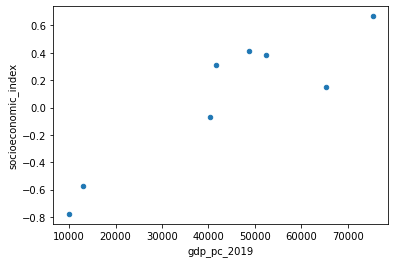

In [28]:
# YOUR CODE HERE: 






#### What are APIs, why use them?

Companies and organizations make certain data available through their Application Programming Interfaces (APIs). To use an API, you make a request to a remote web server via its HTTP address.

You can retrieve data from APIs instead of downloading a static file to your hard drive and reading it in. This is helpful where:
* you want the latest data in real time (eg. stock prices or weather)
* you want a small, selected piece of data (eg. hospital locations in a bounding box)
* the organization will run its own computations for you (eg. request satellite imagery with cloud cover removed, Planet API; analyze sentiment of a document, IBM Watson API).

#### Four steps to using APIs

1. Read the documentation

  APIs are rules specifying what query you should send, and what format of data the server will return back. You query APIs using an HTTP request (ie. a web address). Read the docs to check (i) what the API can do; (ii) what the HTTP request should look like. 
  

2. Find the API endpoint

  Examples: http://api.twitter.com, http://api.github.com


3. Try a sample query in your web brower or terminal: `curl https://api.github.com/users/nj935/repos`

  Queries start with the API endpoint, then add commands using the API's specific format. Send a sample query to see what the output looks like. Normally it will be Javascript Object Notation (JSON).


4. Extract the information you need from the JSON.

  Remember JSON is a widely used data interchange format. It comprises nested dictionaries and lists.


5. Write some code to send custom requests.

  The `requests` library is a painless way to make HTML requests. Using the API's rules and some lines of code, you can quickly request the precise data you want. There are also API wrappers (small Python libraries that manage API requests for you, providing an easier syntax).